# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
#ride_count.head()

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
#total_drivers.head()

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
#total_fares.head()

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides
#avg_fare_per_ride

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers
#avg_fare_per_driver

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides, 
                     "Total Drivers": total_drivers, 
                     "Total Fares": total_fares, 
                     "Average Fare per Ride": avg_fare_per_ride,
                     "Average Fare per Driver": avg_fare_per_driver})
#pyber_summary_df

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [20]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_fare_sum = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
#type_date_fare_sum

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_fare_sum = type_date_fare_sum.reset_index()
#type_date_fare_sum

In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = type_date_fare_sum.pivot(index="date", columns="type", values="fare")

In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
type_date_pivot = type_date_pivot.loc['2019-01-01':'2019-04-29']
#type_date_pivot

In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
type_date_pivot.index = pd.to_datetime(type_date_pivot.index)

In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
#type_date_pivot.info()

In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_date_fare_df = type_date_pivot.resample("W").sum()
type_date_fare_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


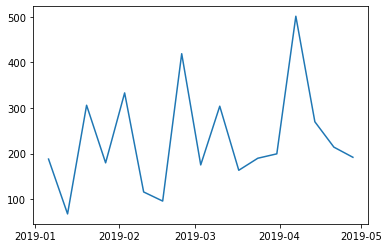

In [28]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.cbook as cbook
# Use the graph style fivethirtyeight.
#style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(type_date_fare_df.index, type_date_fare_df["Rural"])
ax.xaxis.set_major_locator(mdates.MonthLocator())

In [ ]:
type_date_fare = type_date_fare_df.plot(figsize = (20,6))
# Add a title 
type_date_fare.set_title("Number of Rides by Gender")
#  Add a x- and y-axis label.
type_date_fare.set_xlabel("Month")
type_date_fare.set_ylabel("Rides")

plt.show()
plt.tight_layout()

In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
#style.use('fivethirtyeight')
